In [488]:
import random
import matplotlib.pyplot as plt

In [489]:
prior = [0.1, 0.2, 0.4, 0.2, 0.1]  # prior distribution over h1, ..., h5
probability = [1, 0.75, 0.5, 0.25, 0]  # probability of cherry of h1, ..., h5
choices = ["C", "L"]  # Cherry and Lime
n_cherry = []

In [490]:
whichBag = 4
# Creating Dataset
data = random.choices(
    choices, weights=(probability[whichBag], 1 - probability[whichBag]), k=100
)

In [491]:
# Creating first graph
posterior = [[item] for item in prior]  # create empty array
for i in range(100):
    likelihood = []
    # counting number of cherries taken from 0th to i-th unwrap
    n_cherry = 0
    for item in data[: i + 1]:
        if item == "C":
            n_cherry += 1

    for hypoIdx in range(5):
        # calculating likelihood
        if hypoIdx == 0:  # when h1
            if i + 1 == n_cherry:
                curLikelihood = 1
            else:
                curLikelihood = 0
        elif hypoIdx == 4:  # when h5
            if n_cherry == 0:
                curLikelihood = 1
            else:
                curLikelihood = 0
        else:
            curLikelihood = (probability[hypoIdx] ** n_cherry) * (
                (1 - probability[hypoIdx]) ** (i + 1 - n_cherry)
            )
        likelihood.append(curLikelihood)

    # calculating normalizing constant by adding all conditional probabilities
    curNormalization = 0
    for hypoIdx in range(5):
        curNormalization += likelihood[hypoIdx] * prior[hypoIdx]

    for hypoIdx in range(5):
        # calculating posterior
        curPosterior = likelihood[hypoIdx] * prior[hypoIdx] / curNormalization
        posterior[hypoIdx].append(curPosterior)

In [492]:
window = 34
print("Data:", data[:window])
for i in range(5):
    print(posterior[i][window])

Data: ['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L']
0.0
6.775497884359166e-21
2.3280433461951847e-10
0.00011299620932316424
0.9998870035578724


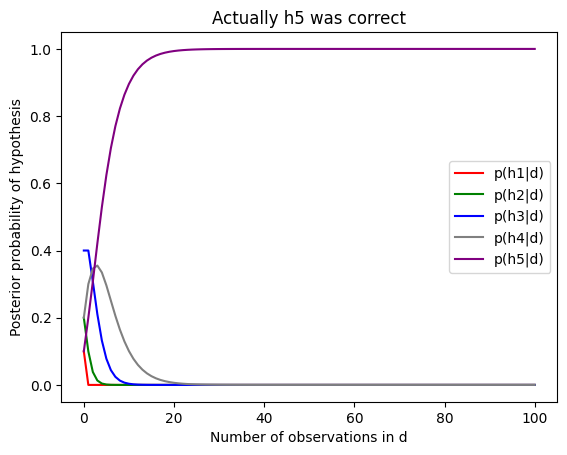

In [493]:
x = [i for i in range(101)]
palette = ['red', 'green', 'blue', 'gray', 'purple']
for i in range(5):
    plt.plot(x, posterior[i], color=palette[i], label="p(h"+str(i+1)+"|d)")
plt.xlabel("Number of observations in d")
plt.ylabel("Posterior probability of hypothesis")
plt.title("Actually h"+str(whichBag+1)+" was correct")
plt.legend()
plt.show()

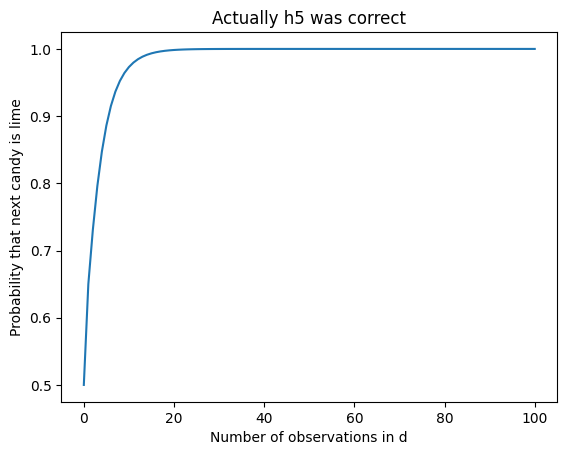

In [494]:
# Creating second graph
prob = []
for i in range(101):
    p = 0
    for hypoIdx in range(5):
        # probability of lime * posterior of each hypothesis
        p += (1 - probability[hypoIdx]) * posterior[hypoIdx][i]
    prob.append(p)

plt.plot(x, prob)
plt.xlabel("Number of observations in d")
plt.ylabel("Probability that next candy is lime")
plt.title("Actually h"+str(whichBag+1)+" was correct")
plt.show()